<a href="https://colab.research.google.com/github/eoinclayton98/CA683-Data-Analytics-and-Data-Mining/blob/main/Ca683_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [68]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,RepeatedStratifiedKFold,StratifiedKFold
from sklearn import metrics


df=pd.read_csv('gdrive/My Drive/CA683/investmentVC.csv', encoding='latin1')

In [ ]:
#Total rows and columns within initial dataset
df.shape

(49438, 39)

In [69]:
#First let's remove all columns we do not need for our data analysis 

df.drop(['permalink', 'undisclosed', 'convertible_note', 'debt_financing', 'post_ipo_equity', 'founded_at', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'homepage_url', 'founded_month', 'founded_quarter', 'state_code', 'city', 'category_list', 'region', 'founded_year', 'first_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding', 'angel', 'grant', 'private_equity', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'], axis=1, inplace=True)
df


,name,market,funding_total_usd,status,country_code,funding_rounds
0,#waywire,News,"1,750,000",acquired,USA,1
1,&TV Communications,Games,"4,000,000",operating,USA,2
2,Rock' Your Paper,Publishing,"40,000",operating,EST,1
3,(In)Touch Network,Electronics,"1,500,000",operating,GBR,1
4,-R- Ranch and Mine,Tourism,"60,000",operating,USA,2
...,...,...,...,...,...,...
49433,Zzish,Education,"320,000",operating,GBR,1
49434,ZZNode Science and Technology,Enterprise Software,"3,174,602",operating,CHN,1
49435,Zzzzapp Wireless ltd.,Web Development,"97,398",operating,HRV,5
49436,[a]list games,Games,"9,300,000",operating,NaN,1


In [ ]:
# Change all acquired values to operating

for index in df.index:
    if df.loc[index,'status']=='acquired':
        df.loc[index,'status'] = 'operating'

df

,name,market,funding_total_usd,status,country_code,funding_rounds
0,#waywire,News,"1,750,000",operating,USA,1
1,&TV Communications,Games,"4,000,000",operating,USA,2
2,Rock' Your Paper,Publishing,"40,000",operating,EST,1
3,(In)Touch Network,Electronics,"1,500,000",operating,GBR,1
4,-R- Ranch and Mine,Tourism,"60,000",operating,USA,2
...,...,...,...,...,...,...
49433,Zzish,Education,"320,000",operating,GBR,1
49434,ZZNode Science and Technology,Enterprise Software,"3,174,602",operating,CHN,1
49435,Zzzzapp Wireless ltd.,Web Development,"97,398",operating,HRV,5
49436,[a]list games,Games,"9,300,000",operating,NaN,1


In [70]:
#Then we will check for duplicate rows

print('Duplicated entries:',df.duplicated().sum())
df[df.duplicated()].isna().mean()
df.dropna(how='all',inplace=True)

Duplicated entries: 1


In [71]:
#Check how many rows have status = NaN and remove them

df[df['status'].isnull()]
df = df[df['status'].notna()]

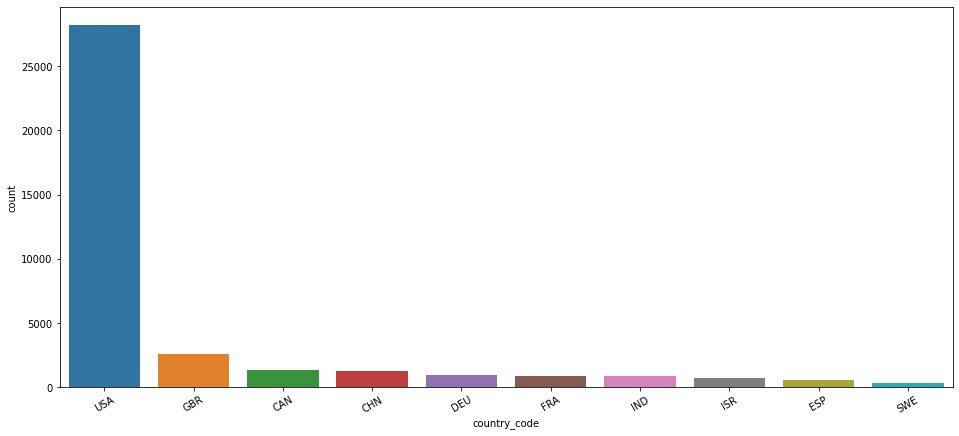

In [46]:
# Top 10 start ups by country 

plt.figure(figsize=(16,7))
g = sns.countplot(x ='country_code', data = df, order=df['country_code'].value_counts().iloc[:10].index)
plt.xticks(rotation=30)
plt.show()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.0,2.013814,1.398832,1.0,1.0,2.0,3.0,15.0
closed,2603.0,1.434114,0.965478,1.0,1.0,1.0,2.0,11.0
operating,41829.0,1.689522,1.302072,1.0,1.0,1.0,2.0,18.0


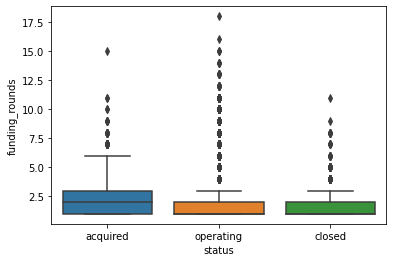

In [47]:
sns.boxplot(data=df,x='status',y='funding_rounds')
df.groupby('status')['funding_rounds'].describe()

In [ ]:
# Logistic Regression for operating and closed

# Convert status from operating and closed into binary

print('Before')
display(df.groupby('status').agg({'country_code':'count'}).sort_values(by=['status'], ascending = False))
StatusDict = { "operating":0,"closed":1}

df = df[(df['status'] == 'operating') |  (df['status'] == 'closed')]
df["status_binary"] = df["status"].map(StatusDict)
df = df.drop(['status'], axis = 1)

print('After')
display(df.groupby('status_binary').agg({'country_code':'count'}).sort_values(by=['status_binary'], ascending = True))

Before


,country_code
status,
operating,18884
closed,990


After


,country_code
status_binary,
0,18884
1,990


In [ ]:
modelling_df = df
X = pd.get_dummies(modelling_df.drop(['status_binary'],axis = 1))
y = modelling_df['status_binary']

In [ ]:
# Splitting the dataset into train and test

X = pd.get_dummies(modelling_df.drop(['status_binary'],axis = 1))
y = modelling_df['status_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
# Training the model and finding the training accuracy and test accuracy

logreg = LogisticRegressionCV(max_iter=10000)
logreg.fit(X_train,y_train)

print('The training model accuracy: {:.4}'.format(logreg.score(X_train,y_train)))
print('The test model accuracy: {:.4}'.format(logreg.score(X_test,y_test)))

The training model accuracy: 0.9463
The test model accuracy: 0.9492


In [ ]:
# What % are Operating and closed

num_operating = np.count_nonzero(results == 0)
print("Number operating: " + str(num_operating))

num_closed = np.count_nonzero(results == 1)
print("Number Closed: " + str(num_closed))

Number operating: 7301
Number Closed: 0


In [ ]:
# Random Forest for operating and closed

# Splitting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 10)

In [ ]:
#Testing the impact of increasing desicion trees used to predict y

n = 10
while n <= 200:
  model = RandomForestClassifier(n_estimators=n)
  model.fit(X_train, y_train)
  print('{} - train score: {:.3f} | test score: {:.3f}'.format(n,model.score(X_train,y_train),model.score(X_test,y_test)))
  n = n+10

10 - train score: 0.985 | test score: 0.946
20 - train score: 0.991 | test score: 0.946
30 - train score: 0.996 | test score: 0.946
40 - train score: 0.997 | test score: 0.946
50 - train score: 0.999 | test score: 0.946
60 - train score: 0.999 | test score: 0.946
70 - train score: 0.999 | test score: 0.946
80 - train score: 1.000 | test score: 0.946
90 - train score: 1.000 | test score: 0.946
100 - train score: 1.000 | test score: 0.946
110 - train score: 1.000 | test score: 0.946
120 - train score: 1.000 | test score: 0.946
130 - train score: 1.000 | test score: 0.946
140 - train score: 1.000 | test score: 0.946
150 - train score: 1.000 | test score: 0.946
160 - train score: 1.000 | test score: 0.946
170 - train score: 1.000 | test score: 0.946
180 - train score: 1.000 | test score: 0.946
190 - train score: 1.000 | test score: 0.946
200 - train score: 1.000 | test score: 0.946


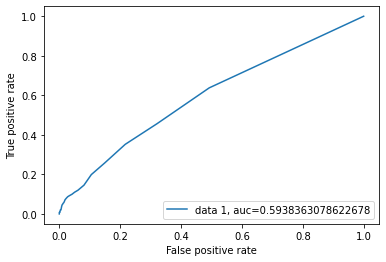

In [ ]:
# Training the model

model = RandomForestClassifier(n_estimators=110) 
model.fit(X_train, y_train)

# Plotting the true positives against the false positives
y_pred_proba = model.predict_proba(X_test) [:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# What % are Operating and closed

pred_results = model.predict(X_test)

num_operating = np.count_nonzero(pred_results == 0)
print("Number operating: " + str(num_operating))

num_closed = np.count_nonzero(pred_results == 1)
print("Number Closed: " + str(num_closed))



Number operating: 7301
Number Closed: 0


In [ ]:
# Confusing matrix for operating and closed

conf_mat = confusion_matrix(y_test, pred_results)
print(conf_mat)

[[6909    0]
 [ 392    0]]


In [72]:
# Logistic Regression for acquired and closed

# Convert status from operating and closed into binary

print('Before')
display(df.groupby('status').agg({'country_code':'count'}).sort_values(by=['status'], ascending = False))
StatusDict = { "acquired":0,"closed":1}

df = df[(df['status'] == 'closed') |  (df['status'] == 'acquired')]
df["status_binary"] = df["status"].map(StatusDict)
df = df.drop(['status'], axis = 1)

print('After')
display(df.groupby('status_binary').agg({'country_code':'count'}).sort_values(by=['status_binary'], ascending = True))

Before


,country_code
status,
operating,37390
closed,2195
acquired,3472


After


,country_code
status_binary,
0,3472
1,2195


In [11]:
modelling_df = df
X = pd.get_dummies(modelling_df.drop(['status_binary'],axis = 1))
y = modelling_df['status_binary']

In [12]:
# Splitting the dataset into train and test

X = pd.get_dummies(modelling_df.drop(['status_binary'],axis = 1))
y = modelling_df['status_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [13]:
# Training the model and finding the training accuracy and test accuracy

logreg = LogisticRegressionCV(max_iter=10000)
logreg.fit(X_train,y_train)

print('The training model accuracy: {:.4}'.format(logreg.score(X_train,y_train)))
print('The test model accuracy: {:.4}'.format(logreg.score(X_test,y_test)))

The training model accuracy: 0.8072
The test model accuracy: 0.6848


In [23]:
# Number of companies that are acquired and closed

prediction = logreg.predict(X_test)

num_acquired = np.count_nonzero(prediction == 0)
acquired_percentage = (num_acquired/len(X_test))*100
print("Number acquired: " + str(num_acquired) + " (" + str(round(acquired_percentage)) + "%)")

num_closed = np.count_nonzero(prediction == 1)
closed_percentage = (num_closed/len(X_test))*100
print("Number Closed: " + str(num_closed) + " (" + str(round(closed_percentage)) + "%)")


Number acquired: 1426 (69%)
Number Closed: 652 (31%)


In [16]:
# Confusion matrix for aquired and closed

conf_mat = confusion_matrix(y_test, prediction)
print(conf_mat)

[[1000  229]
 [ 426  423]]


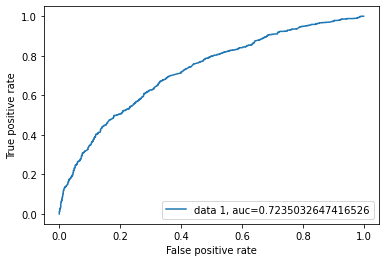

In [26]:
# Plotting the true positives against the false positives

y_pred_proba = logreg.predict_proba(X_test) [:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

In [64]:
# Random Forest for aquired and closed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 10)

In [33]:
#Testing the impact of increasing desicion trees used to predict y

n = 10
while n <= 200:
  model = RandomForestClassifier(n_estimators=n)
  model.fit(X_train, y_train)
  print('{} - train score: {:.3f} | test score: {:.3f}'.format(n,model.score(X_train,y_train),model.score(X_test,y_test)))
  n = n+10

10 - train score: 0.967 | test score: 0.667
20 - train score: 0.987 | test score: 0.662
30 - train score: 0.995 | test score: 0.676
40 - train score: 0.997 | test score: 0.671
50 - train score: 0.999 | test score: 0.679
60 - train score: 0.999 | test score: 0.677
70 - train score: 1.000 | test score: 0.676
80 - train score: 1.000 | test score: 0.675
90 - train score: 1.000 | test score: 0.682
100 - train score: 1.000 | test score: 0.673
110 - train score: 1.000 | test score: 0.675
120 - train score: 1.000 | test score: 0.674
130 - train score: 1.000 | test score: 0.672
140 - train score: 1.000 | test score: 0.668
150 - train score: 1.000 | test score: 0.680
160 - train score: 1.000 | test score: 0.674
170 - train score: 1.000 | test score: 0.675
180 - train score: 1.000 | test score: 0.675
190 - train score: 1.000 | test score: 0.675
200 - train score: 1.000 | test score: 0.679


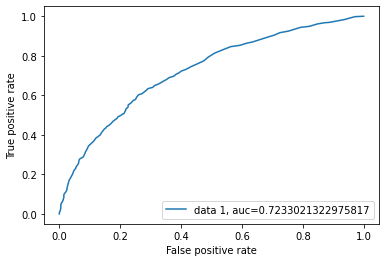

In [34]:
model = RandomForestClassifier(n_estimators=110) 
model.fit(X_train, y_train)

# Plotting the true positives against the false positives
y_pred_proba = model.predict_proba(X_test) [:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

In [36]:
# Number of companies that are acquired and closed

prediction = logreg.predict(X_test)

num_acquired = np.count_nonzero(prediction == 0)
acquired_percentage = (num_acquired/len(X_test))*100
print("Number acquired: " + str(num_acquired) + " (" + str(round(acquired_percentage)) + "%)")

num_closed = np.count_nonzero(prediction == 1)
closed_percentage = (num_closed/len(X_test))*100
print("Number Closed: " + str(num_closed) + " (" + str(round(closed_percentage)) + "%)")


Number acquired: 1402 (67%)
Number Closed: 676 (33%)


In [37]:
conf_mat = confusion_matrix(y_test, pred_results)
print(conf_mat)

[[983 218]
 [461 416]]


In [75]:
# Number of companies that are acquired and closed in actual dataset

num_acquired = np.count_nonzero(y_test == 0)
acquired_percentage = (num_acquired/len(X_test))*100
print(str(round(acquired_percentage)) + "% acquired")

num_closed = np.count_nonzero(y_test == 1)
closed_percentage = (num_closed/len(y_test))*100
print(str(round(closed_percentage)) + "% Closed")

58% acquired
42% Closed
